<a href="https://colab.research.google.com/github/freison/DeepLearning/blob/master/Part1_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory 2: Computer Vision

## Part 1: MNIST Digit Classification

In [3]:
import tensorflow as tf
tf.enable_eager_execution()
import matplotlib.pyplot as plt
import numpy as np
import random
from progressbar import progressbar

# Download the class repository
! git clone https://github.com/aamini/introtodeeplearning_labs.git  > /dev/null 2>&1
% cd introtodeeplearning_labs 
! git pull
% cd ..

# Import the necessary class-specific utility files for this lab
import introtodeeplearning_labs as util

/content/introtodeeplearning_labs
Already up to date.
/content


In [0]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = np.expand_dims(train_images, axis = -1)/255.
train_labels = np.int64(train_labels)
test_images = np.expand_dims(test_images, axis = -1)/255.
test_labels = np.int64(test_labels)

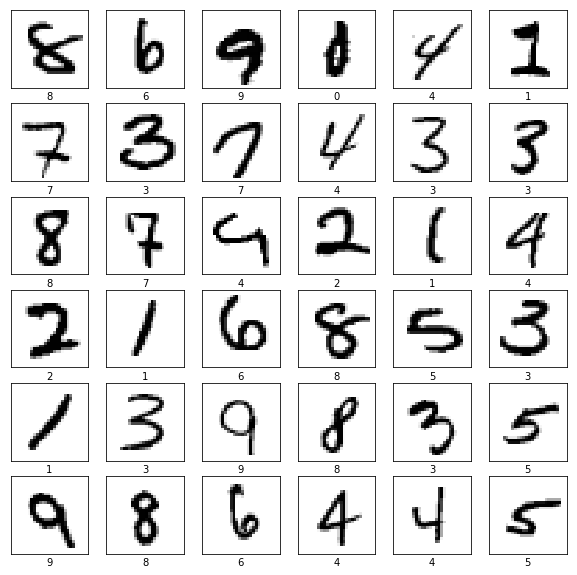

In [15]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

In [0]:
# Fully connected neural network architecture
def build_fc_model():
  fc_model = tf.keras.Sequential([
      # First define a Flatten layer
      tf.keras.layers.Flatten(),
      # '''TODO: Define the activation function for the first fully connected layer.'''
      tf.keras.layers.Dense(128, activation=tf.nn.relu), # TODO (activation)
      # '''TODO: Define the second Dense layer to output the classification probabilities'''
      tf.keras.layers.Dense(10, activation=tf.nn.softmax) # TODO (both dimension and activation)
  ])
  return fc_model

model = build_fc_model()

In [0]:
'''TODO: Experiment with different optimizer and learning rates. How do these affect
   the accurarcy of the trained model? Which optimizer and/or learning rates yield
   the best performace'''
model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=1e-1), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# model.compile(optimizer ='adam',
#               loss = 'sparse_categorical_crossentropy',
#               metrics = ['accuracy'])


# Train the model
We're now ready to train our model, which will involve feeding the training data (train_images and train_labels) into the model, and then asking it to learn the associations between images and labels. We'll also need to define the batch size and the number of epochs, or iterations over the MNIST dataset, to use during training. With the Keras API and defining the model settings in the compile step, training is all accomplished by calling the fit method on an instance of the Model class.

In [0]:
# Define the batch size and the number of epoch to use during training
BATCH_SIZE = 64
EPOCHS = 5

In [30]:
#model.fit(train_images, train_labels, batch_size = BATCH_SIZE, epochs = EPOCH)
model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/8
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3691 - acc: 0.8972
Epoch 2/8
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1927 - acc: 0.9459
Epoch 3/8
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1444 - acc: 0.9600
Epoch 4/8
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1173 - acc: 0.9671
Epoch 5/8
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0994 - acc: 0.9722
Epoch 6/8
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0864 - acc: 0.9755
Epoch 7/8
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0760 - acc: 0.9785
Epoch 8/8
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0677 - acc: 0.9810


In [31]:
'''TODO: Use the evaluate method to test the model!'''
test_loss, test_acc = model.evaluate(test_images, test_labels) #TODO

print("Test accuracy:", test_acc)

10000/10000 [==============================] - 0s 46us/sample - loss: 0.0816 - acc: 0.9754
('Test accuracy:', 0.9754)


In [40]:
def build_cnn_model():
  cnn_model = tf.keras.Sequential([
      
      tf.keras.layers.Conv2D(filters = 24, kernel_size = (3,3), input_shape=(28,28,1), activation = tf.nn.relu),
      tf.keras.layers.MaxPool2D(pool_size = (2,2)),
      
      # Define the second convolutional layer
      tf.keras.layers.Conv2D(filters = 36, kernel_size = (3,3), activation = tf.nn.relu),
      tf.keras.layers.MaxPool2D(pool_size = (2,2)),
      
      # Define the flatten layer
      tf.keras.layers.Flatten(),
      # Define the first hidden layer fully connected
      tf.keras.layers.Dense(128, activation = tf.nn.relu),
      tf.keras.layers.Dense(10, activation = tf.nn.softmax)
  ])
  return cnn_model

cnn_model = build_cnn_model()
print(cnn_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 24)        240       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 24)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 36)        7812      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 36)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 900)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               115328    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total para

# Train and test the CNN model
Now, as before, we can define the loss function, optimizer, and metrics through the compile method. Compile the CNN model with an optimizer and learning rate of choice:

In [0]:
'''TODO: Define the compile operation with your optimizer and learning rate of choice'''
cnn_model.compile(optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-1),
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

In [42]:
'''TODO: Train the CNN model'''
cnn_model.fit(train_images, train_labels, batch_size = BATCH_SIZE, epochs = EPOCHS)

Epoch 1/5
60000/60000 [==============================] - 51s 852us/sample - loss: 0.2440 - acc: 0.9255
Epoch 2/5
60000/60000 [==============================] - 50s 839us/sample - loss: 0.0694 - acc: 0.9780
Epoch 3/5
60000/60000 [==============================] - 50s 839us/sample - loss: 0.0496 - acc: 0.9842
Epoch 4/5
60000/60000 [==============================] - 50s 838us/sample - loss: 0.0388 - acc: 0.9881
Epoch 5/5
60000/60000 [==============================] - 50s 837us/sample - loss: 0.0322 - acc: 0.9900


In [43]:
'''TODO: Use the evaluate method to test themodel!'''
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

print("Test accuracy: ", test_acc)

10000/10000 [==============================] - 3s 330us/sample - loss: 0.0343 - acc: 0.9881
('Test accuracy: ', 0.9881)


In [0]:
predictions = cnn_model.predict(test_images)

In [45]:
predictions[0]

array([3.9632027e-08, 2.3496600e-09, 3.0530250e-06, 1.7091403e-05,
       1.2769044e-11, 2.0412485e-09, 3.2188911e-12, 9.9997938e-01,
       5.3270231e-08, 4.4323858e-07], dtype=float32)

In [46]:
'''TODO: Identify digit with the highest confidence prediction for the first image in the test dataset'''
np.argmax(predictions[0])

7

In [47]:
test_labels[0]

7

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(np.squeeze(img), cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

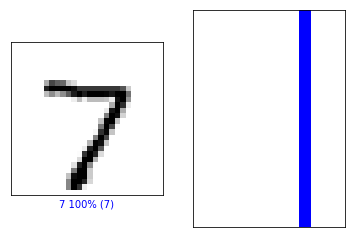

In [55]:
#@title Change the slider to look at the model's predictions! { run: "auto" }

image_index = 0 #@param {type:"slider", min:0, max:100, step:1}
plt.subplot(1,2,1)
plot_image(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(image_index, predictions,  test_labels)

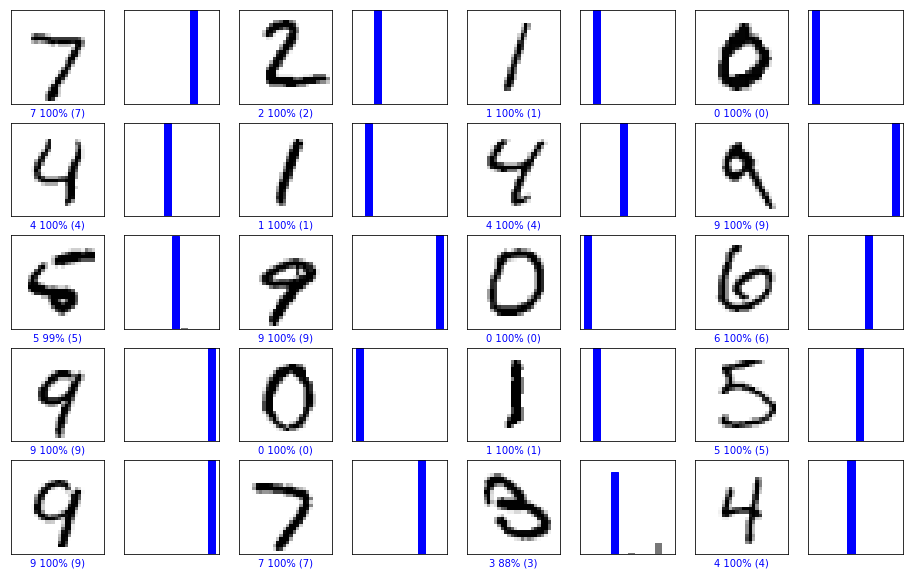

In [56]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

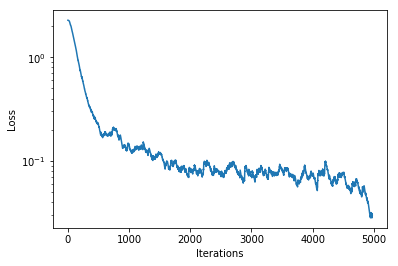

100%|#########################################################|Time:  0:01:50  


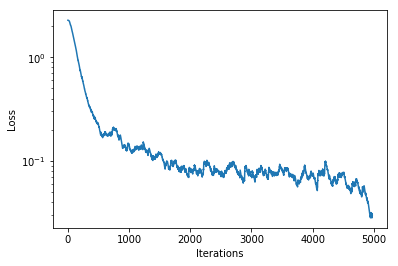

In [57]:
# Rebuild the CNN model
cnn_model = build_cnn_model()

batch_size = 12
loss_history = util.LossHistory(smoothing_factor=0.99) # to record the evolution of the loss
plotter = util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss', scale='semilogy')
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-2) # define our optimizer

bar = util.create_progress_bar()
for idx in bar(range(0, train_images.shape[0],batch_size)):
  # First grab a batch of training data and convert the input images to tensors
  (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
  images = tf.convert_to_tensor(images, dtype=tf.float32)

  # GradientTape to record differentiation operations
  with tf.GradientTape() as tape:
    logits = cnn_model(images) # feed the images into the model
    loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits) # value of the loss

  loss_history.append(loss_value.numpy().mean()) # append the loss to the loss_history record
  plotter.plot(loss_history.get())
  # Backpropagation
  grads = tape.gradient(loss_value, cnn_model.variables)
  optimizer.apply_gradients(zip(grads, cnn_model.variables),
                            global_step=tf.train.get_or_create_global_step())